<a href="https://colab.research.google.com/github/lfslucius/Future-Sales-Prediction/blob/main/656_Proj_1217_1910_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

### Load Data

In [ ]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Load data
sales_train = pd.read_csv('sales_train.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

### Explore Data

In [ ]:
# Train Set
print("----------Top-5- Record----------")
print(sales_train.head(5))
print("-----------Information-----------")
print(sales_train.info())
print("-----------Data Types-----------")
print(sales_train.dtypes)
print("----------Missing value-----------")
print(sales_train.isnull().sum())
print("----------Null value-----------")
print(sales_train.isna().sum())
print("----------Shape of Data----------")
print(sales_train.shape)

----------Top-5- Record----------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
-----------Data Types-----------
date               object
date_block_num  

In [ ]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
# Item Data
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [ ]:
items.shape

(22170, 3)

In [ ]:
# Shop Data
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
shops.shape

(60, 2)

### Clean Outliers and Duplicates

Sales volume outliers: [ 8057 20949  9242 19437  3731 11373  9249  9248]
Item price outliers: [11365  6066 13199]


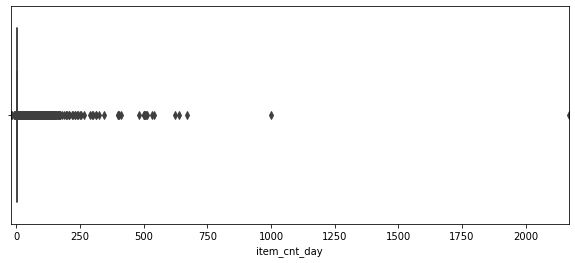

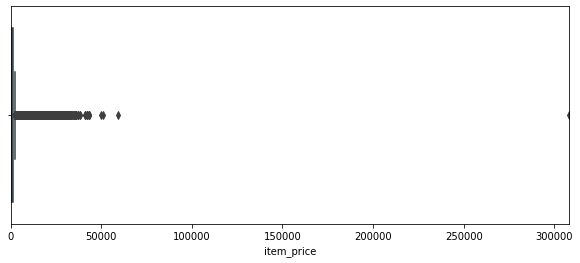

In [ ]:
# Checking for outliers
plt.figure(figsize=(10,4))
plt.xlim(sales_train['item_cnt_day'].min(), sales_train['item_cnt_day'].max())
sns.boxplot(x=sales_train['item_cnt_day'])
print('Sales volume outliers:',sales_train['item_id'][sales_train['item_cnt_day']>500].unique())

plt.figure(figsize=(10,4))
plt.xlim(sales_train['item_price'].min(), sales_train['item_price'].max())
sns.boxplot(x=sales_train['item_price'])
print('Item price outliers:',sales_train['item_id'][sales_train['item_price']>50000].unique())

In [ ]:
# Clean outliers
sales_train = sales_train.drop(sales_train[(sales_train['item_cnt_day']>500) | (sales_train['item_price']>50000)].index)
print('Sales volume outliers:',sales_train['item_id'][sales_train['item_cnt_day']>500].unique())
print('Item price outliers:',sales_train['item_id'][sales_train['item_price']>50000].unique())

Sales volume outliers: []
Item price outliers: []


In [ ]:
# Drop Duplicates
subset = ['date','date_block_num','shop_id','item_id','item_cnt_day']
print(sales_train.duplicated(subset=subset).value_counts())
sales_train.drop_duplicates(subset=subset, inplace=True)

False    2935810
True          24
dtype: int64


In [ ]:
# Replace empty or negative values in the 'item_cnt_day'
sales_train.loc[sales_train["item_cnt_day"] < 0] = 0
sales_train['item_cnt_day'].fillna(0, inplace=True)
sales_train['item_cnt_day'].isna().sum()

0

In [ ]:
# Drop empty in the 'item_price' with the median values in the same categories
train_category = pd.merge(sales_train, items.loc[:,['item_id','item_category_id']], on=['item_id'], how='left')
train_category.dropna(how="any", axis=0, subset = ["item_price"], inplace = True)
train_category.isna().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

In [ ]:
# Checking negative values in the 'item_price'
train_category = train_category.drop(train_category[(train_category['item_price']<0)].index)
print('Sales volume outliers:',train_category['item_id'][train_category['item_price']<0].unique())

Sales volume outliers: []


In [ ]:
date_trans=pd.DataFrame(train_category["date"])

import matplotlib as mpl
date_format = mpl.dates.DateFormatter("%m.%d.%y")

In [ ]:
train_category

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,0,0,0,0,0.00,0.0,40
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
...,...,...,...,...,...,...,...
2935805,10.10.2015,33,25,7409,299.00,1.0,55
2935806,09.10.2015,33,25,7460,299.00,1.0,55
2935807,14.10.2015,33,25,7459,349.00,1.0,55
2935808,22.10.2015,33,25,7440,299.00,1.0,57


In [ ]:
train_category["date"]=pd.to_datetime(train_category["date"])
train_category.dtypes

date                datetime64[ns]
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_cnt_day               float64
item_category_id             int64
dtype: object

In [ ]:
train_category=train_category[~(train_category["date"]<'2013-01-01')]
train_category=train_category[~(train_category["date"]>'2015-12-01')]
train_category

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-02-01,0,59,22154,999.00,1.0,37
1,2013-03-01,0,25,2552,899.00,1.0,58
3,2013-06-01,0,25,2554,1709.05,1.0,58
4,2013-01-15,0,25,2555,1099.00,1.0,56
5,2013-10-01,0,25,2564,349.00,1.0,59
...,...,...,...,...,...,...,...
2935805,2015-10-10,33,25,7409,299.00,1.0,55
2935806,2015-09-10,33,25,7460,299.00,1.0,55
2935807,2015-10-14,33,25,7459,349.00,1.0,55
2935808,2015-10-22,33,25,7440,299.00,1.0,57


### Reformat

There is an obvious "seasonality" (Eg: peak sales around a time of year) and a decreasing "Trend".

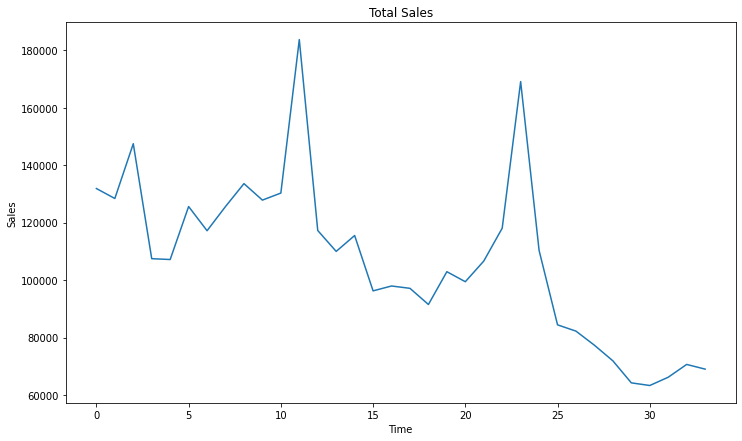

In [ ]:
sales_trend=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
sales_trend.astype('float')
plt.figure(figsize=(12,7))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(sales_trend)


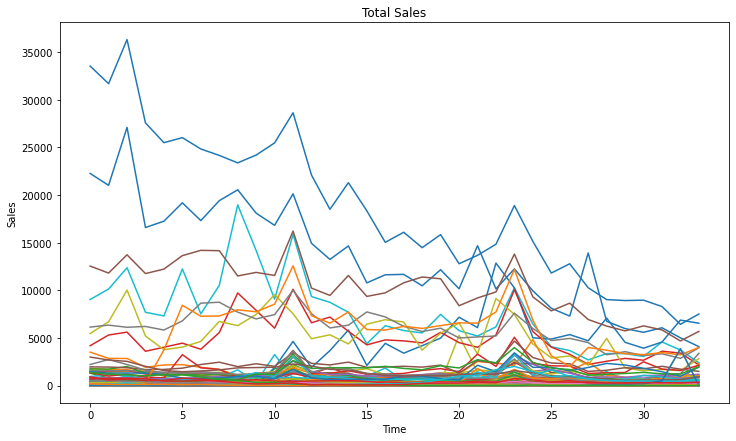

In [ ]:
# train_category = pd.merge(train_monthly, items, on=['item_id'], how='left')
#fig = plt(figsize=(15, 6))

category_plot=train_category.pivot_table(index=['date_block_num'], columns=['item_category_id'], values='item_cnt_day', aggfunc=np.sum, fill_value=0).plot(figsize=(12,7),title='Total Sales',xlabel='Time',ylabel='Sales',legend=False)



In [ ]:
# Add new season features
months=train_category['date_block_num']
train_category['season']=train_category.date_block_num.apply(lambda x:'spring' if (x>=0 and x<=2)or(x>=12 and x<=14)or(x>=24 and x<=26) else ('summer' if (x>=3 and x<=5)or(x>=15 and x<=17)or(x>=27 and x<=29)else ('autumn' if (x>=6 and x<=8)or(x>=18 and x<=20)or(x>=30 and x<=32) else 'winter')))
season_dummy=pd.get_dummies(train_category['season'], drop_first=True)
sales_train = pd.concat([train_category.drop(columns='season'),season_dummy],axis=1)
train_category

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,season
0,2013-02-01,0,59,22154,999.00,1.0,37,spring
1,2013-03-01,0,25,2552,899.00,1.0,58,spring
3,2013-06-01,0,25,2554,1709.05,1.0,58,spring
4,2013-01-15,0,25,2555,1099.00,1.0,56,spring
5,2013-10-01,0,25,2564,349.00,1.0,59,spring
...,...,...,...,...,...,...,...,...
2935805,2015-10-10,33,25,7409,299.00,1.0,55,winter
2935806,2015-09-10,33,25,7460,299.00,1.0,55,winter
2935807,2015-10-14,33,25,7459,349.00,1.0,55,winter
2935808,2015-10-22,33,25,7440,299.00,1.0,57,winter


In [ ]:
# Group by four features and make aggregations
sales_train = sales_train.groupby(['date_block_num', 'shop_id', 'item_id', 'item_category_id']).agg({'item_price':'mean','item_cnt_day':'sum', 'spring':'mean', 'summer':'mean', 'winter':'mean'}).reset_index()
sales_train = sales_train.drop(sales_train.index[[0]])
sales_train

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,spring,summer,winter
1,0,0,33,37,347.0,3.0,1.0,0.0,0.0
2,0,0,35,40,247.0,1.0,1.0,0.0,0.0
3,0,0,43,40,221.0,1.0,1.0,0.0,0.0
4,0,0,51,57,128.5,2.0,1.0,0.0,0.0
5,0,0,61,43,195.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1601483,33,59,22087,83,119.0,6.0,0.0,0.0,1.0
1601484,33,59,22088,83,119.0,2.0,0.0,0.0,1.0
1601485,33,59,22091,83,179.0,1.0,0.0,0.0,1.0
1601486,33,59,22100,42,629.0,1.0,0.0,0.0,1.0


In [ ]:
# change the item-cnt-day to the last column
new_cols = [col for col in sales_train.columns if col != 'item_cnt_day'] + ['item_cnt_day']
sales_train = sales_train[new_cols]

In [ ]:
sales_train

,date_block_num,shop_id,item_id,item_category_id,item_price,spring,summer,winter,item_cnt_day
1,0,0,33,37,347.0,1.0,0.0,0.0,3.0
2,0,0,35,40,247.0,1.0,0.0,0.0,1.0
3,0,0,43,40,221.0,1.0,0.0,0.0,1.0
4,0,0,51,57,128.5,1.0,0.0,0.0,2.0
5,0,0,61,43,195.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1601483,33,59,22087,83,119.0,0.0,0.0,1.0,6.0
1601484,33,59,22088,83,119.0,0.0,0.0,1.0,2.0
1601485,33,59,22091,83,179.0,0.0,0.0,1.0,1.0
1601486,33,59,22100,42,629.0,0.0,0.0,1.0,1.0


### Scaling

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.preprocessing import StandardScaler
  #import time
sc = StandardScaler()
X = np.array(sales_train.drop(['item_cnt_day'], axis =1 ))
Y = np.array(sales_train.iloc[:,-1])
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)


## Modeling

In [ ]:
# to Save All accuracies
performance = pd.DataFrame(columns=['Model Name','RMSE','R^2'],) 

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Define The Model
r1_regressor = LinearRegression()
# Fitting The Model
r1_regressor.fit(X_train,Y_train)
#Prediction The Test Set Results
r1_pred = r1_regressor.predict(X_test)
# Calculate R^2 & RMSE
rmse = mean_squared_error(Y_test,r1_pred,squared = False)
r2 = r2_score(Y_test, r1_pred)
rmse

8.186544027952158

In [ ]:
newResult = {'Model Name':'Linear Reg','RMSE':rmse,'R^2':r2} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,RMSE,R^2
0,Linear Reg,8.186544,0.001335


### 2. LASSO

In [ ]:
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV 

In [ ]:
alphas = 10**np.linspace(-7,-3,100)
lasso_cofficients = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha, normalize=True, max_iter=10000)
    lasso.fit(X_train, Y_train)
    lasso_cofficients.append(lasso.coef_)

/home/guest/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/guest/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

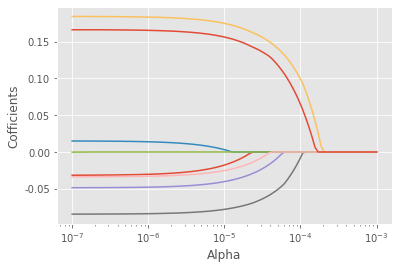

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.plot(alphas, lasso_cofficients)
plt.xscale('log')
plt.axis('tight')
#plt.title('relationship between alpha and coef')
plt.xlabel('Alpha')
plt.ylabel('Cofficients')
plt.show()

In [ ]:
# LASSO回归模型的交叉验证
lasso_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(X_train, Y_train)
# 取出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_
#lasso_best_alpha

/home/guest/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
# based on the best alpha
lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(X_train, Y_train)
lasso_predict = lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,lasso_predict))
r2 = r2_score(Y_test, lasso_predict)
rmse

/home/guest/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


8.186545763575163

In [ ]:
newResult = {'Model Name':'Lasso','RMSE':rmse,'R^2':r2}   
performance = performance.append(newResult,ignore_index=True)
performance

,Model Name,RMSE,R^2
0,Linear Reg,8.186544,0.001335
1,Lasso,8.186546,0.001335


### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Define The Model
r3_rforest = RandomForestRegressor(max_depth=20, n_estimators=500)
#(max_features=8,  random_state=1)
r3_rforest.fit(X_train,Y_train)
#Test on Testing Data
r3_pred = r3_rforest.predict(X_test)

In [ ]:
#Calculate R^2 & RMSE
r2 = r2_score(Y_test, r3_pred, multioutput='variance_weighted')
rmse = mean_squared_error(Y_test,r3_pred,squared=False)
r2
rmse

4.809519892574994

In [ ]:
newResult = {'Model Name':'RandomForestRegressor','RMSE':rmse,'R^2':r2}   
performance = performance.append(newResult,ignore_index=True)
performance

,Model Name,RMSE,R^2
0,Linear Reg,8.186544,0.001335
1,Lasso,8.186546,0.001335
2,RandomForestRegressor,4.809520,0.655315


### 4. XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#Define The Model
r5_xgb = XGBRegressor(max_depth=10, n_estimators=500, subsample = 0.6, min_child_weight=0.5, alpha = 0.1,learning_rate=0.3, n_jobs=8) 
r5_xgb.fit(X_train, Y_train) 
#Test on Testing Data
r5_pred = r5_xgb.predict(X_test)
#Calculate R^2 & RMSE
r2 = r2_score(Y_test, r5_pred, multioutput='variance_weighted')
rmse = mean_squared_error(Y_test,r5_pred,squared=False)
r2
rmse

4.565746814156909

In [ ]:
newResult = {'Model Name':'XGB','RMSE':rmse,'R^2':r2}   
performance = performance.append(newResult,ignore_index=True)
performance

,Model Name,RMSE,R^2
0,XGB,4.565747,0.689371


### 5. LightGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#Define The Model
r4_lgbm = LGBMRegressor(max_depth=10, learning_rate = 0.5, n_estimators=500, subsample=0.8, random_state = 42)
r4_lgbm.fit(X_train,Y_train)
#Test on Testing Data
r4_pred = r4_lgbm.predict(X_test)
#Calculate R^2 & RMSE
r2 = r2_score(Y_test, r4_pred, multioutput='variance_weighted')
rmse = mean_squared_error(Y_test,r4_pred,squared=False)
r2
rmse

4.817173939295272

In [ ]:
newResult = {'Model Name':'LGBM','RMSE':rmse,'R^2':r2}   
performance = performance.append(newResult,ignore_index=True)
performance

,Model Name,RMSE,R^2
0,Linear Reg,8.186544,0.001335
1,Lasso,8.186546,0.001335
2,RandomForestRegressor,4.809520,0.655315
3,XGB,4.680707,0.673531
4,XGB,4.572031,0.688515
5,LGBM,4.817174,0.654217


### 6. Neural Network

In [ ]:
np.random.seed(42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(8,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(5, activation="relu", name="dense_2")(x)
#x = layers.Dense(4, activation="relu", name="dense_3")(x)
outputs = layers.Dense(1, activation="relu", name="predictions")(x)
r6_nnet = keras.Model(inputs = inputs, outputs = outputs)
r6_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='mse',
  # List of metrics to monitor
  metrics=['mean_squared_error'],
)

In [ ]:
r6_history = r6_nnet.fit(
  X_train,
  Y_train,
  batch_size=32,
  epochs=100
)

Epoch 1/100
37535/37535 [==============================] - 16s 423us/step - loss: 64.1261 - mean_squared_error: 64.1261
Epoch 2/100
37535/37535 [==============================] - 16s 421us/step - loss: 62.4180 - mean_squared_error: 62.4180
Epoch 3/100
37535/37535 [==============================] - 16s 423us/step - loss: 60.8719 - mean_squared_error: 60.8719
Epoch 4/100
37535/37535 [==============================] - 16s 424us/step - loss: 59.9520 - mean_squared_error: 59.9520
Epoch 5/100
37535/37535 [==============================] - 16s 423us/step - loss: 58.8652 - mean_squared_error: 58.8652
Epoch 6/100
37535/37535 [==============================] - 16s 423us/step - loss: 57.4253 - mean_squared_error: 57.4253
Epoch 7/100
37535/37535 [==============================] - 16s 423us/step - loss: 55.6480 - mean_squared_error: 55.6480
Epoch 8/100
37535/37535 [==============================] - 16s 422us/step - loss: 54.3298 - mean_squared_error: 54.3298
Epoch 9/100
37535/37535 [===============

In [ ]:
r6_nnet_pred = r6_nnet.predict(X_test)
#Calculate R^2 & RMSE
r2 = r2_score(Y_test, r6_nnet_pred)
rmse = mean_squared_error(Y_test, r6_nnet_pred, squared=False)
r2
rmse

7.252962068615049

In [ ]:
newResult = {'Model Name':'Neural Network','RMSE':rmse,'R^2':r2}   
performance = performance.append(newResult,ignore_index=True)
performance

,Model Name,RMSE,R^2
0,Linear Reg,8.186544,0.001335
1,Lasso,8.186546,0.001335
2,RandomForestRegressor,4.809520,0.655315
3,XGB,4.572031,0.688515
4,LGBM,4.817174,0.654217
5,Neural Network,7.252962,0.216120


## Visualize Results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Linear Reg'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'RandomForestRegressor'),
  Text(3, 0, 'XGB'),
  Text(4, 0, 'LGBM'),
  Text(5, 0, 'Neural Network')])

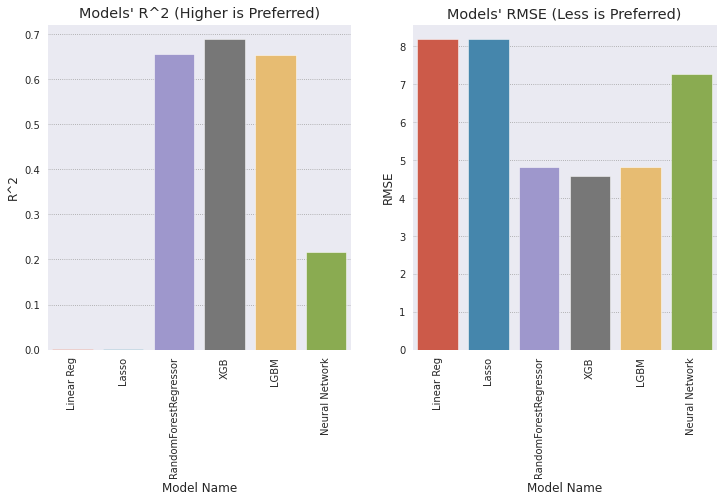

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title("Models' R^2 (Higher is Preferred)")
sns.barplot(x='Model Name',y='R^2',data=performance,)
plt.xticks(rotation="90")

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.title("Models' RMSE (Less is Preferred)")
sns.barplot(x='Model Name',y='RMSE',data=performance,)
plt.xticks(rotation="90")

## Test Result

### Prepare Test Data

In [ ]:
# Prepare The Test Data
test['date_block_num'] = 34
test_data=test[['date_block_num', 'shop_id','item_id']]
sales_train_winter = sales_train.loc[sales_train['winter'] == 1]
Test_set = pd.merge(test_data,  sales_train_winter.loc[:,['shop_id', 'item_id','item_category_id', 'item_price']], on=['shop_id', 'item_id'], how='left')
Test_set = pd.merge(Test_set, items.loc[:,['item_id','item_category_id']], on=['item_id'], how='left')
Test_set.drop(columns='item_category_id_x', inplace=True)
Test_set.rename(columns={'item_category_id_y':'item_category_id'}, inplace=True)

In [ ]:
# Apply the "item_price", refering to the price in the same catgeory and season, into the test set in terms of the values in train set

sales_category_winter_dic = sales_train_winter[['item_category_id', 'item_price']]
sales_category_winter_dic = sales_category_winter_dic.groupby('item_category_id').agg({'item_price':'median'}).reset_index()

Test_set['item_price'] = np.where(Test_set['item_price'].isnull(),Test_set['item_category_id'].map(sales_category_winter_dic.set_index('item_category_id')['item_price']),Test_set['item_price'])


In [ ]:
# For some categories have not been sold in the winter, apply the average prices in the same categories from all months
sales_category_dic = sales_train[['item_category_id', 'item_price']]
sales_category_dic = sales_category_dic.groupby('item_category_id').agg({'item_price':'median'}).reset_index()

Test_set['item_price'] = np.where(Test_set['item_price'].isnull(),Test_set['item_category_id'].map(sales_category_dic.set_index('item_category_id')['item_price']),Test_set['item_price'])


In [ ]:
# Confirm whether there is NA in the test file
Test_set.isna().sum()

date_block_num      0
shop_id             0
item_id             0
item_price          0
item_category_id    0
dtype: int64

In [ ]:
# Although the same category and season, some items still have several prices in the history. Let's group them and take the average prices.
Test_set = Test_set.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_price':'mean', 'item_category_id':'mean'}).reset_index()

In [ ]:
# Add the weather into train set
Test_set['spring'] = 0
Test_set['summer'] = 0
Test_set['winter'] = 1

In [ ]:
Test_set

,date_block_num,shop_id,item_id,item_price,item_category_id,spring,summer,winter
0,34,2,30,149.0,40.0,0,0,1
1,34,2,31,399.0,37.0,0,0,1
2,34,2,32,149.0,40.0,0,0,1
3,34,2,33,199.0,37.0,0,0,1
4,34,2,38,699.0,41.0,0,0,1
...,...,...,...,...,...,...,...,...
214195,34,59,22162,149.0,40.0,0,0,1
214196,34,59,22163,149.0,40.0,0,0,1
214197,34,59,22164,299.0,37.0,0,0,1
214198,34,59,22166,150.0,54.0,0,0,1


In [ ]:
#Test_set['ID'] = range(len(Test_set))
order1 = ['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'item_price', 'spring', 'summer', 'winter']
Test_set = Test_set[order1]
Test_set

,date_block_num,shop_id,item_id,item_category_id,item_price,spring,summer,winter
0,34,2,30,40.0,149.0,0,0,1
1,34,2,31,37.0,399.0,0,0,1
2,34,2,32,40.0,149.0,0,0,1
3,34,2,33,37.0,199.0,0,0,1
4,34,2,38,41.0,699.0,0,0,1
...,...,...,...,...,...,...,...,...
214195,34,59,22162,40.0,149.0,0,0,1
214196,34,59,22163,40.0,149.0,0,0,1
214197,34,59,22164,37.0,299.0,0,0,1
214198,34,59,22166,54.0,150.0,0,0,1


### Print out the output of sales

In [ ]:
X_Test = np.array(Test_set)
#Y_Test = np.array(sales_train.iloc[:,-1])
X_Test = sc.fit_transform(X_Test)
Test_set['item_cnt_month'] = pd.Series(r5_xgb.predict(X_Test)) # the output model

<ipython-input-53-81faddb5f88d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_set['item_cnt_month'] = pd.Series(r5_xgb.predict(X_Test)) # the output model


In [ ]:
Test_set['ID'] = range(len(Test_set))
order2 = ['ID','item_cnt_month']
Test_set = Test_set[order2]
Test_set

<ipython-input-54-4e6bdcd58c42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_set['ID'] = range(len(Test_set))


,ID,item_cnt_month
0,0,-2.910872
1,1,2.752608
2,2,-2.910872
3,3,-0.400707
4,4,-1.447380
...,...,...
214195,214195,6.691376
214196,214196,6.691376
214197,214197,2.008110
214198,214198,0.935945


In [ ]:
Test_set[Test_set < 0] =0
Test_set

<ipython-input-55-d629d61ce748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_set[Test_set < 0] =0
/home/guest/.local/lib/python3.8/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,ID,item_cnt_month
0,0,0.000000
1,1,2.752608
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
214195,214195,6.691376
214196,214196,6.691376
214197,214197,2.008110
214198,214198,0.935945


In [ ]:
# Output as a CSV file
Test_set.to_csv('submission.csv', index=False)